# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
from scipy.stats import norm, skew 
import scipy.cluster.hierarchy as shc

In [3]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import classification_report, f1_score 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold 
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [5]:
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [1602]:
allen = pd.read_csv("Dataset.csv")

In [1603]:
allen.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [1604]:
allen.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [1605]:
allen.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# EDA - Exploratory Data Analysis - I

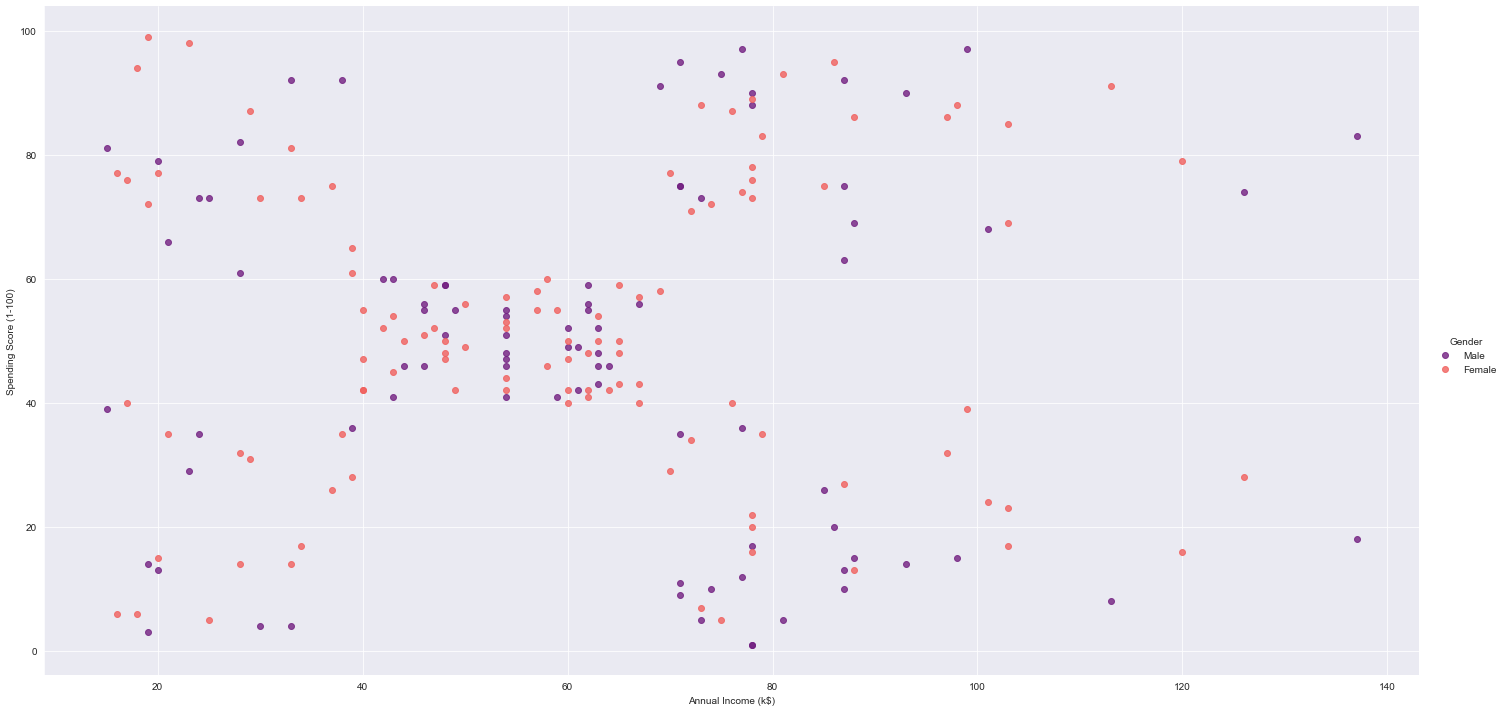

In [1606]:
sns.set_style('darkgrid')
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data=allen, hue='Gender',
           palette='magma', size=10, aspect=2, fit_reg=False)

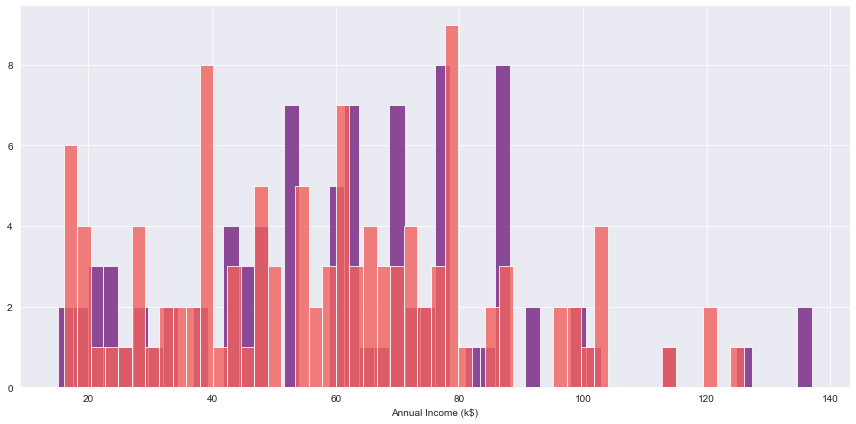

In [1607]:
sns.set_style('darkgrid')
g1 = sns.FacetGrid(allen,hue="Gender",palette='magma',size=6,aspect=2)
g1 = g1.map(plt.hist,'Annual Income (k$)',bins=50,alpha=0.8)

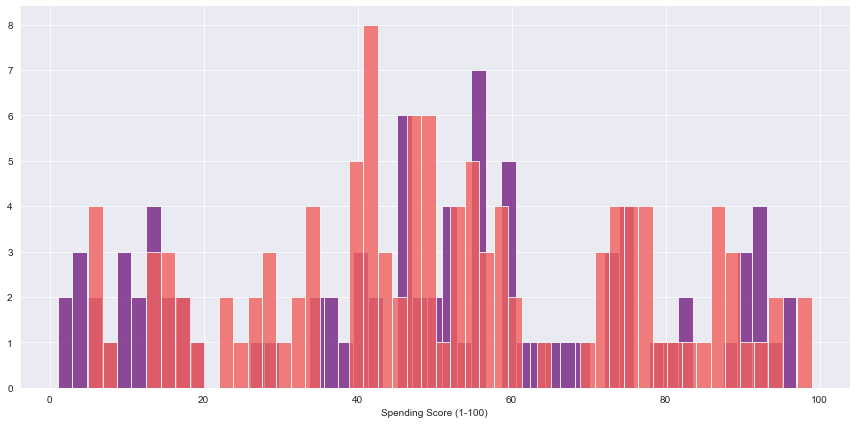

In [1608]:
sns.set_style('darkgrid')
g2 = sns.FacetGrid(allen,hue="Gender",palette='magma',size=6,aspect=2)
g2 = g2.map(plt.hist,'Spending Score (1-100)',bins=50,alpha=0.8)

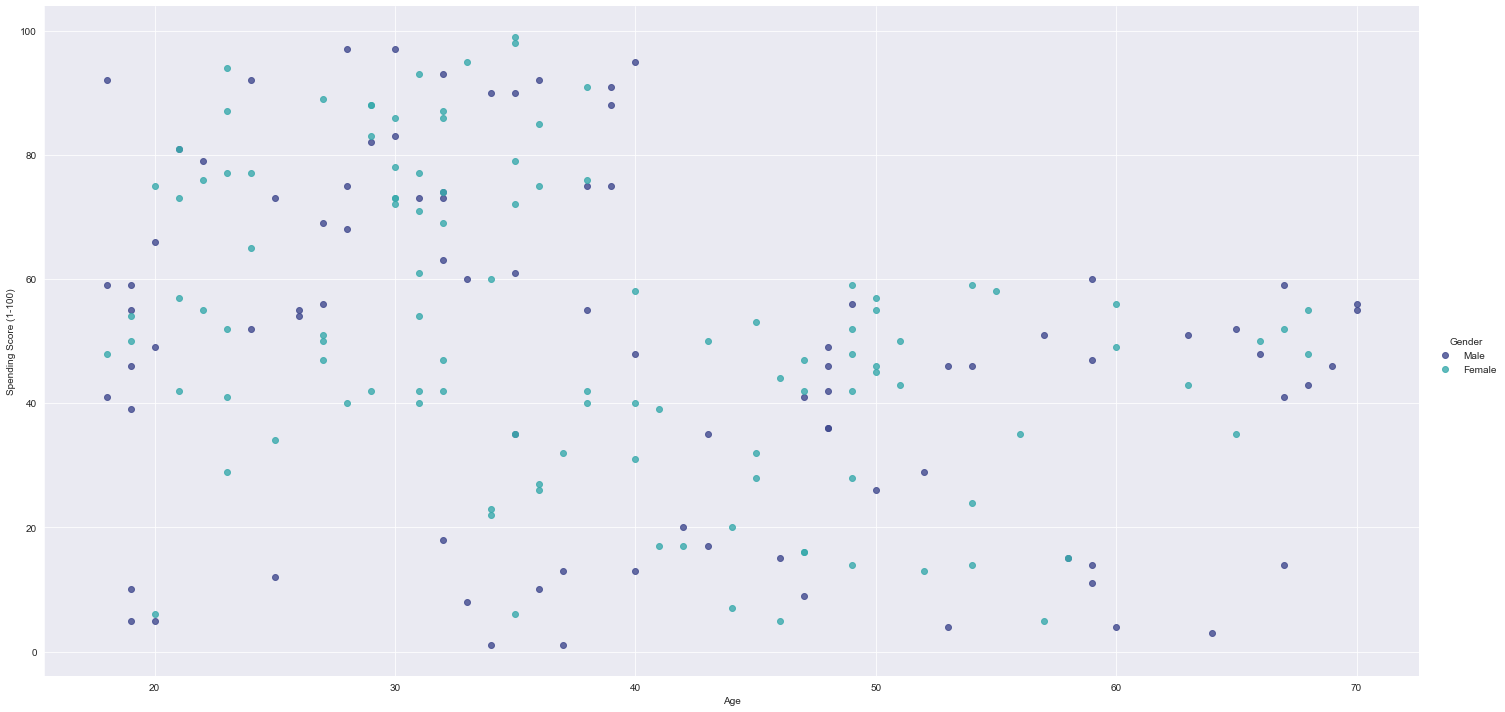

In [1609]:
sns.set_style('darkgrid')
sns.lmplot('Age', 'Spending Score (1-100)', data=allen, hue='Gender',
           palette='mako', size=10, aspect=2, fit_reg=False)

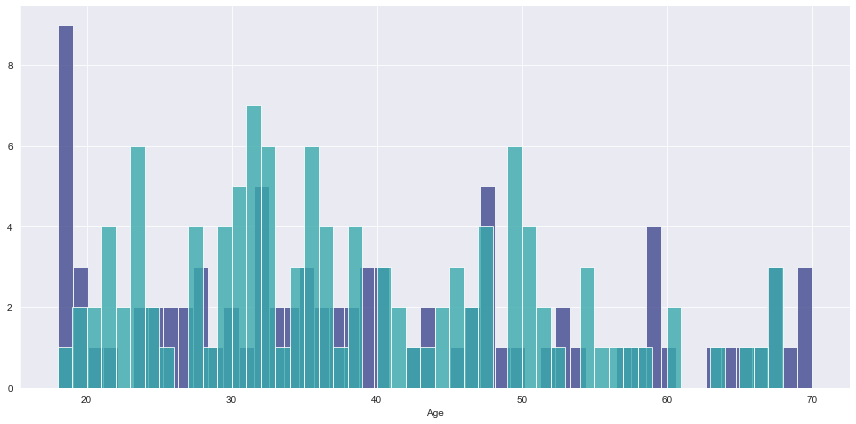

In [1610]:
sns.set_style('darkgrid')
g3 = sns.FacetGrid(allen,hue="Gender",palette='mako',size=6,aspect=2)
g3 = g3.map(plt.hist,'Age',bins=50,alpha=0.8)

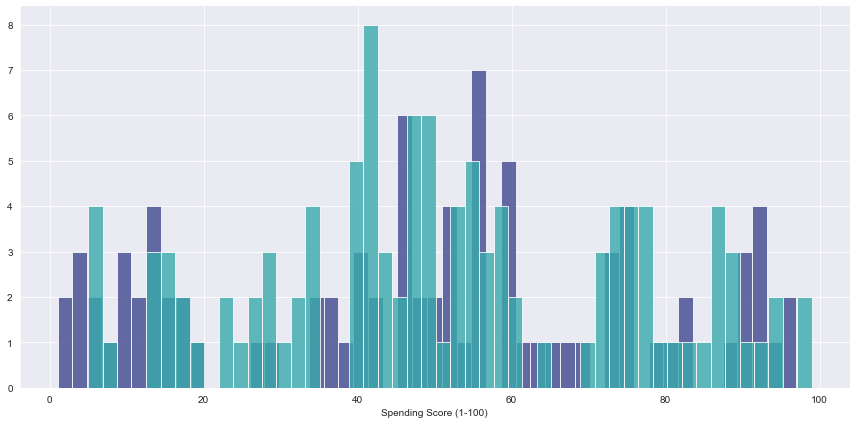

In [1611]:
sns.set_style('darkgrid')
g4 = sns.FacetGrid(allen,hue="Gender",palette='mako',size=6,aspect=2)
g4 = g4.map(plt.hist,'Spending Score (1-100)',bins=50,alpha=0.8)

# EDA - Exploratory Data Analysis - II

In [1612]:
px.box(allen[['Gender', 'Spending Score (1-100)']].sort_values(by='Gender'), 
        x='Gender', y='Spending Score (1-100)', color='Gender')

In [1613]:
px.box(allen[['Gender', 'Annual Income (k$)']].sort_values(by='Gender'), 
        x='Gender', y='Annual Income (k$)', color='Gender')

In [1614]:
px.box(allen[['Gender', 'Age']].sort_values(by='Gender'), 
        x='Gender', y='Age', color='Gender')

In [1615]:
px.scatter(allen, x='Annual Income (k$)', y='Spending Score (1-100)', color='Age')

In [1616]:
px.scatter(allen, x='Annual Income (k$)', y='Spending Score (1-100)', color='Gender')

# EDA - Exploratory Data Analysis - III

In [1617]:
allen_corr = allen.corr()
allen_corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [1618]:
allen_corr.style.background_gradient(cmap='coolwarm', axis=None)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


# Label Encoding

In [1619]:
l1 = preprocessing.LabelEncoder()
f1 = l1.fit_transform(allen['Gender']) 
f1 = pd.DataFrame(data=f1, columns=['Gender'])

In [1620]:
print(list(l1.inverse_transform([0,1])))

['Female', 'Male']


In [1621]:
allen['Gender'] = f1['Gender']

In [1622]:
allen.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [1623]:
px.scatter_3d(allen, x="Gender", y="Age", z="Spending Score (1-100)",color="Age").show()

# PCA

### Model

In [1624]:
model0 = PCA(n_components = 2)
model0.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

PCA(n_components=2)

In [1625]:
allen0 = model0.transform(allen.drop(['CustomerID', 'Gender'], axis=1))

In [1626]:
model0.explained_variance_ratio_

array([0.45125272, 0.44098465])

### Plotting

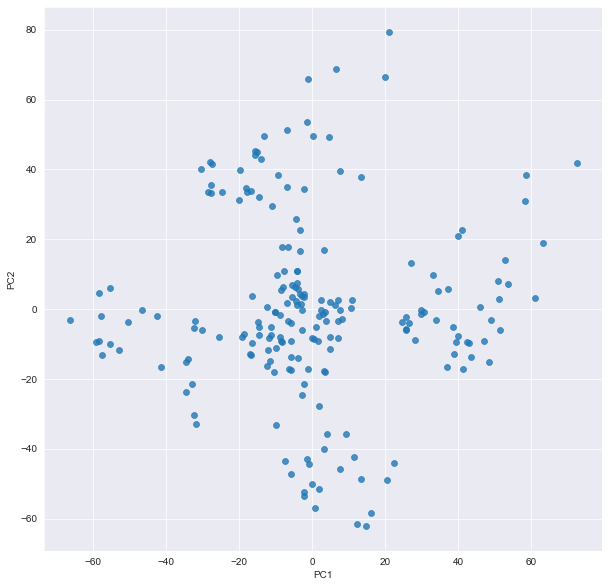

In [1627]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# K-Means

In [1628]:
inertia1 = []
sa1 = []
for n in range(2,11):
    model1 = KMeans(n_clusters = n, random_state = 40, algorithm = 'elkan')
    model1.fit(allen.drop(['CustomerID', 'Gender'], axis=1))
    cluster_labels1 = model1.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1))
    inertia1.append(model1.inertia_)
    sa1.append(silhouette_score(allen.drop(['CustomerID', 'Gender'], axis=1), cluster_labels1))

### Elbow Method 

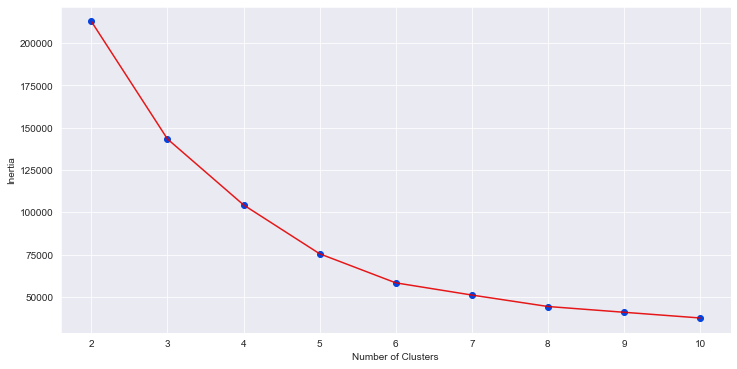

In [1629]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(2,11), inertia1, 'o', c = sns.xkcd_rgb['blue'])
plt.plot(np.arange(2,11), inertia1, '-', c = sns.xkcd_rgb['red'], alpha = 0.9)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Silhouette Method

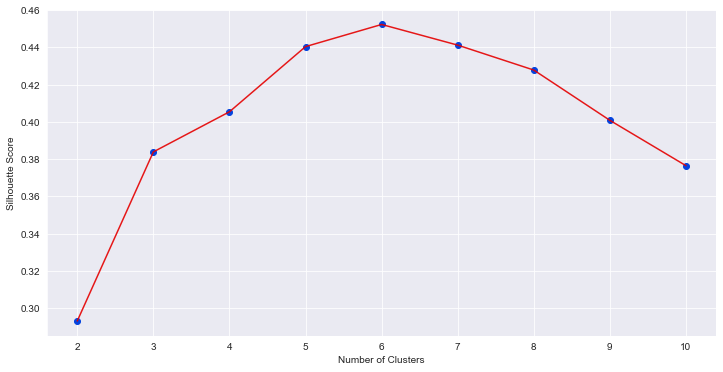

In [1630]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(2,11), sa1, 'o', c = sns.xkcd_rgb['blue'])
plt.plot(np.arange(2,11), sa1, '-', c = sns.xkcd_rgb['red'], alpha = 0.9)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

### Model (n=6)

In [1631]:
model1 = KMeans(n_clusters = 6, random_state = 21, algorithm = "elkan")
model1.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

KMeans(algorithm='elkan', n_clusters=6, random_state=21)

In [1632]:
allen1 = model1.labels_
print(allen1)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 2 3 2 0 4 3 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 5 0 5 1 5 1 5 1 5 0 5 1 5 1 5 1 5 1 5 0 5 1 5 1 5
 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1
 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5]


In [1633]:
model1.cluster_centers_

array([[27.        , 56.65789474, 49.13157895],
       [41.68571429, 88.22857143, 17.28571429],
       [56.15555556, 53.37777778, 49.08888889],
       [25.27272727, 25.72727273, 79.36363636],
       [44.14285714, 25.14285714, 19.52380952],
       [32.69230769, 86.53846154, 82.12820513]])

### Plotting

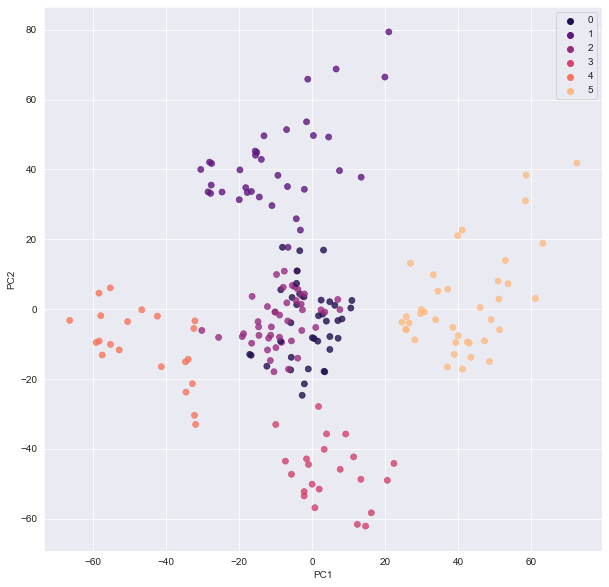

In [1634]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=allen1,
    palette=sns.color_palette('magma', 6), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Save

In [1635]:
allen11 = pd.DataFrame({'Model':'K-Means',
        'No. of Clusters':["6"],
        'Elbow Score':[model1.inertia_],
        'Silhouette Score':[silhouette_score(allen.drop(['CustomerID', 'Gender'], axis=1), 
         model1.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)))]})

In [1636]:
allen11.head()

,Model,No. of Clusters,Elbow Score,Silhouette Score
0,K-Means,6,58300.443322,0.452344


# Birch

In [1637]:
sa2 = []
for n in range(2,11):
    model2 = Birch(branching_factor = 2, n_clusters = n, threshold = 5)
    model2.fit(allen.drop(['CustomerID', 'Gender'], axis=1))
    cluster_labels2 = model2.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1))
    sa2.append(silhouette_score(allen.drop(['CustomerID', 'Gender'], axis=1), cluster_labels2))

### Silhouette Method

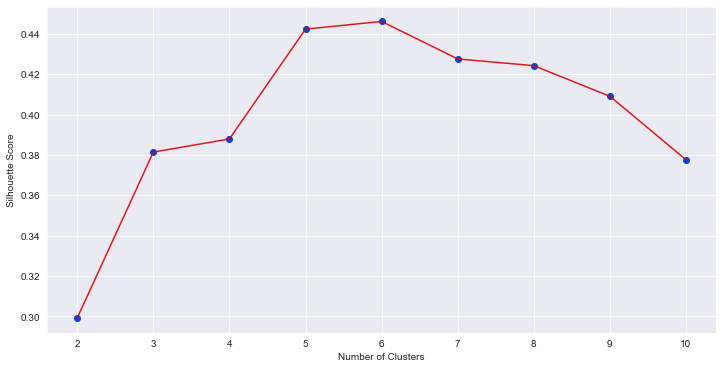

In [1638]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(2,11), sa2, 'o', c = sns.xkcd_rgb['blue'])
plt.plot(np.arange(2,11), sa2, '-', c = sns.xkcd_rgb['red'], alpha = 0.9)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

### Model (n=6)

In [1639]:
model2 = Birch(branching_factor = 2, n_clusters = 6, threshold = 5)
model2.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

Birch(branching_factor=2, n_clusters=6, threshold=5)

In [1640]:
allen2 = model2.labels_
print(allen2)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 5 4 1 3 1 3 5 3 3 3 5 3 3 5 5 5 5 5 3 5 5 3 5 5 5 3 5 5 3 3 5 5 5 5
 5 3 5 5 3 5 5 5 5 5 3 5 5 3 5 5 5 3 5 5 5 3 5 3 5 3 3 5 5 3 5 3 5 5 5 5 5
 3 5 3 3 3 5 5 5 5 3 5 5 2 3 2 0 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


### Plotting

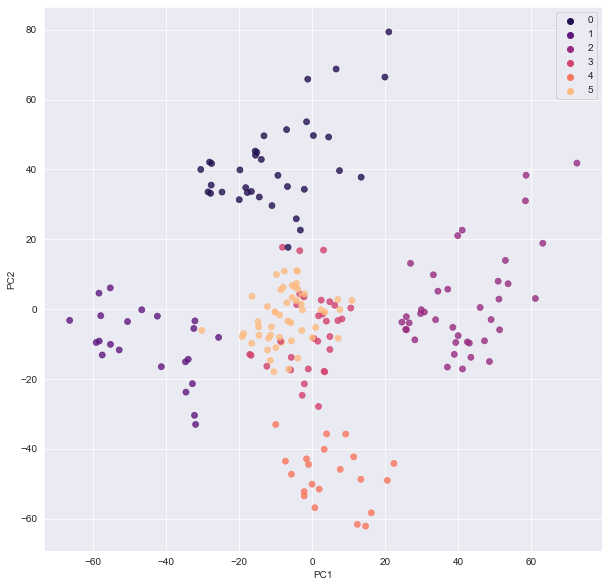

In [1642]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=allen2,
    palette=sns.color_palette('magma', 6), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Save

In [1643]:
allen12 = pd.DataFrame({'Model':'Birch',
        'No. of Clusters':["6"],
        'Elbow Score':["Undefined"],
        'Silhouette Score':[silhouette_score(allen.drop(['CustomerID', 'Gender'], axis=1), 
         model2.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)))]})

In [1644]:
allen12.head()

,Model,No. of Clusters,Elbow Score,Silhouette Score
0,Birch,6,Undefined,0.446113


# DBSCAN

In [1645]:
sa3 = []
for n in range(3,20):
    model3 = DBSCAN(eps = n, min_samples = 3)
    model3.fit(allen.drop(['CustomerID', 'Gender'], axis=1))
    cluster_labels3 = model3.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1))
    sa3.append(silhouette_score(allen.drop(['CustomerID', 'Gender'], axis=1), cluster_labels3))

### Silhouette Method

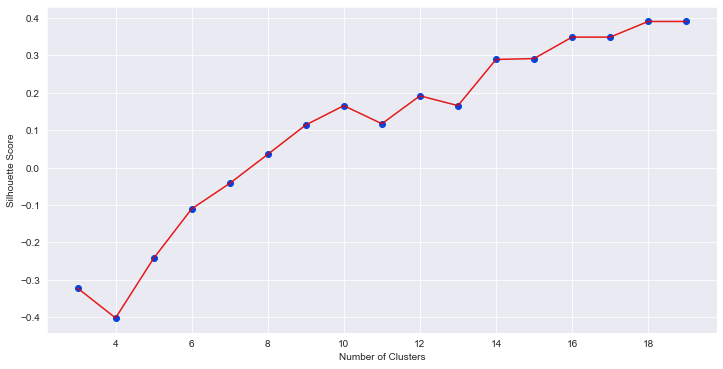

In [1646]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(3,20), sa3, 'o', c = sns.xkcd_rgb['blue'])
plt.plot(np.arange(3,20), sa3, '-', c = sns.xkcd_rgb['red'], alpha = 0.9)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

### Model (eps=12)

In [1647]:
model3 = DBSCAN(eps = 12, min_samples = 3)
model3.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

DBSCAN(eps=12, min_samples=3)

In [1648]:
allen3 = model3.labels_
print(allen3)

[-1  0 -1  0  1  0 -1 -1  1  0  1 -1  1  0 -1  0  1  0  1 -1  1  0  1  0
  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  4  2  0  2  3  2  3  2  4  2  5  2  3  2  5  2  3  2  4  2
  5  2  0  2  3  2  3  2  3  2  3  2  3  2  3  2  0  2  5  2  3  2  3  2
  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2 -1 -1  3  2  3 -1
 -1  2 -1 -1 -1 -1 -1 -1]


### Plotting

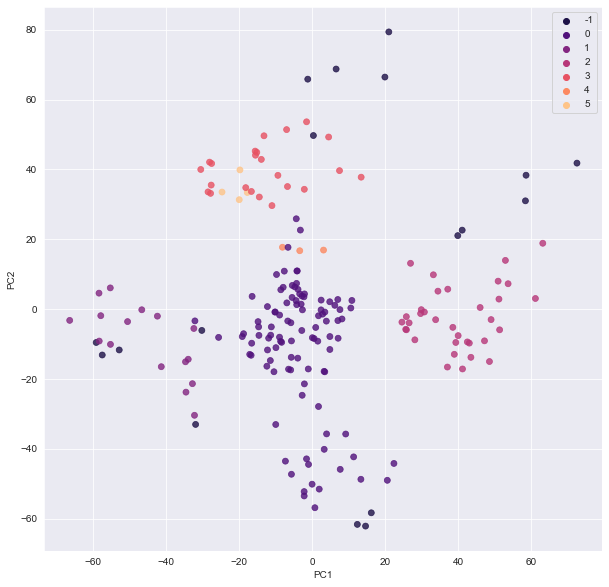

In [1649]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=allen3,
    palette=sns.color_palette('magma', 7), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Save

In [1650]:
allen13 = pd.DataFrame({'Model':'DBSCAN',
        'No. of Clusters':["7"],
        'Elbow Score':["Undefined"],
        'Silhouette Score':[silhouette_score(allen.drop(['CustomerID', 'Gender'], axis=1), 
         model3.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)))]})

In [1651]:
allen13.head()

,Model,No. of Clusters,Elbow Score,Silhouette Score
0,DBSCAN,7,Undefined,0.191888


# Gaussian Mixture

In [1652]:
sa4 = []
for n in range(2,11):
    model4 = GaussianMixture(n_components = n)
    model4.fit(allen.drop(['CustomerID', 'Gender'], axis=1))
    cluster_labels4 = model4.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1))
    sa4.append(silhouette_score(allen.drop(['CustomerID', 'Gender'], axis=1), cluster_labels4))

### Silhouette Method

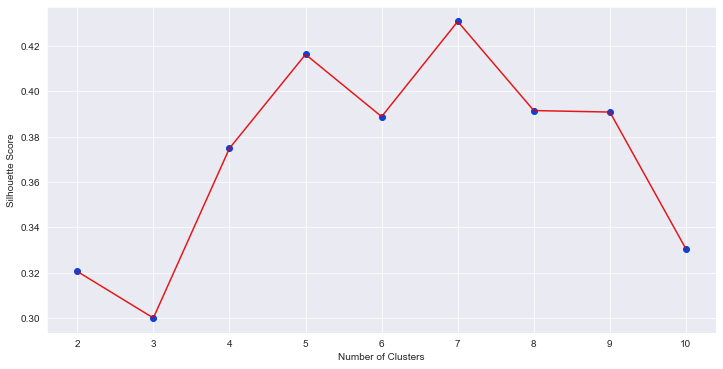

In [1653]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(2,11), sa4, 'o', c = sns.xkcd_rgb['blue'])
plt.plot(np.arange(2,11), sa4, '-', c = sns.xkcd_rgb['red'], alpha = 0.9)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

### Model (n=6)

In [1654]:
model4 = GaussianMixture(n_components = 6)
model4.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

GaussianMixture(n_components=6)

In [1655]:
allen4 = model4.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1))
print(allen4)

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 1 5 4 5 4 5 4 5 4 5
 4 5 4 5 4 5 1 5 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 0 3 1 3 0 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 0 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


### Plotting

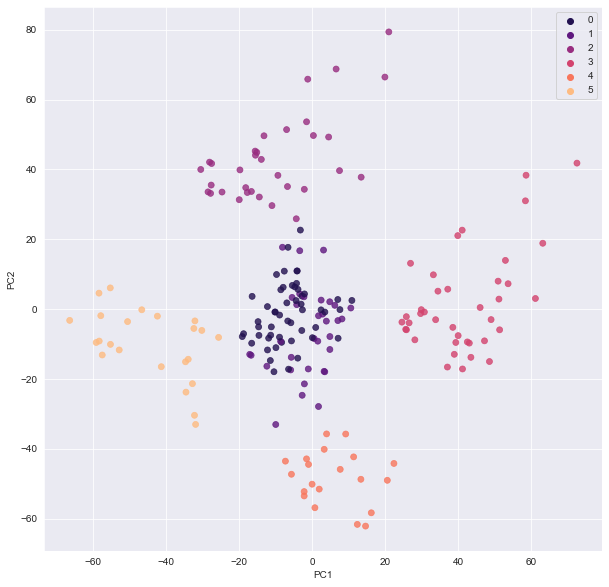

In [1656]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=allen4,
    palette=sns.color_palette('magma', 6), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Save

In [1657]:
allen14 = pd.DataFrame({'Model':'Gaussian Mixture',
        'No. of Clusters':["6"],
        'Elbow Score':["Undefined"],
        'Silhouette Score':[silhouette_score(allen.drop(['CustomerID', 'Gender'], axis=1), 
         model4.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)))]})

In [1658]:
allen14.head()

,Model,No. of Clusters,Elbow Score,Silhouette Score
0,Gaussian Mixture,6,Undefined,0.380643


# Agglomerative

In [1659]:
sa5 = []
for n in range(2,11):
    model5 = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean')
    model5.fit(allen.drop(['CustomerID', 'Gender'], axis=1))
    cluster_labels5 = model5.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1))
    sa5.append(silhouette_score(allen.drop(['CustomerID', 'Gender'], axis=1), cluster_labels5))

### Silhouette Method

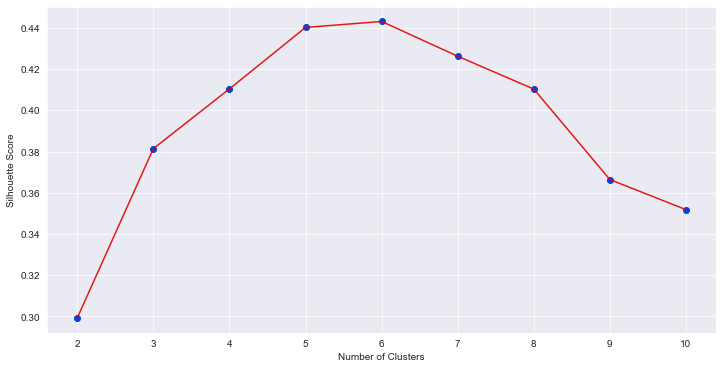

In [1660]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(2,11), sa5, 'o', c = sns.xkcd_rgb['blue'])
plt.plot(np.arange(2,11), sa5, '-', c = sns.xkcd_rgb['red'], alpha = 0.9)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

### Model (n=6)

In [1661]:
model5 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean')
model5.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

AgglomerativeClustering(n_clusters=6)

In [1662]:
allen5 = model5.labels_
print(allen5)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 5 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 5 4 5 1 5 5 5 1 5 5 1 1 1 1 1 5 1 1 5 1 1 1 5 1 1 5 5 1 1 1 1
 1 5 1 1 5 1 1 1 1 1 5 1 1 5 1 1 1 5 1 1 1 5 1 5 1 5 5 1 1 5 1 5 1 1 1 1 1
 5 1 5 5 5 1 1 1 1 5 1 1 2 5 2 0 2 0 2 0 2 5 2 0 2 0 2 0 2 0 2 5 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


### Plotting

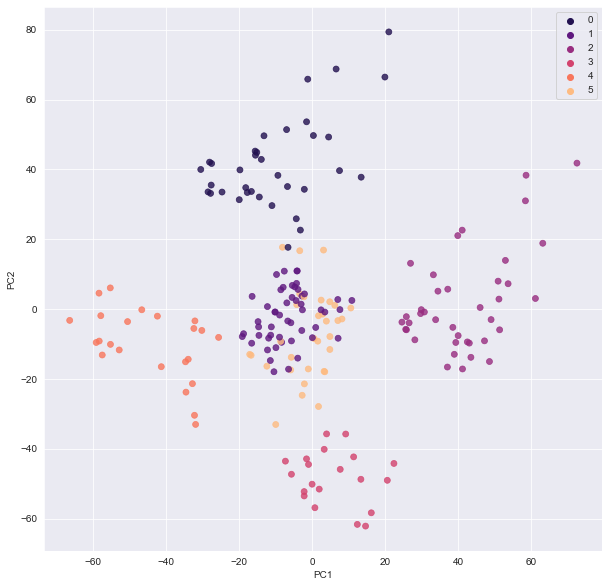

In [1663]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=allen5,
    palette=sns.color_palette('magma', 6), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Save

In [1664]:
allen15 = pd.DataFrame({'Model':'Agglomerative',
        'No. of Clusters':["6"],
        'Elbow Score':["Undefined"],
        'Silhouette Score':[silhouette_score(allen.drop(['CustomerID', 'Gender'], axis=1), 
         model5.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)))]})

In [1665]:
allen15.head()

,Model,No. of Clusters,Elbow Score,Silhouette Score
0,Agglomerative,6,Undefined,0.443089


# Concat - I

In [1666]:
al1 = pd.concat([allen11,allen12,allen13,allen14,allen15],axis=0).reset_index()
al1 = al1.drop('index',axis=1)
al1

,Model,No. of Clusters,Elbow Score,Silhouette Score
0,K-Means,6,58300.4,0.452344
1,Birch,6,Undefined,0.446113
2,DBSCAN,7,Undefined,0.191888
3,Gaussian Mixture,6,Undefined,0.380643
4,Agglomerative,6,Undefined,0.443089


# Clustering as Classification

### K-Means

In [1769]:
model6 = KMeans(n_clusters = 2, random_state = 21, algorithm = "elkan")
model6.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

KMeans(algorithm='elkan', n_clusters=2, random_state=21)

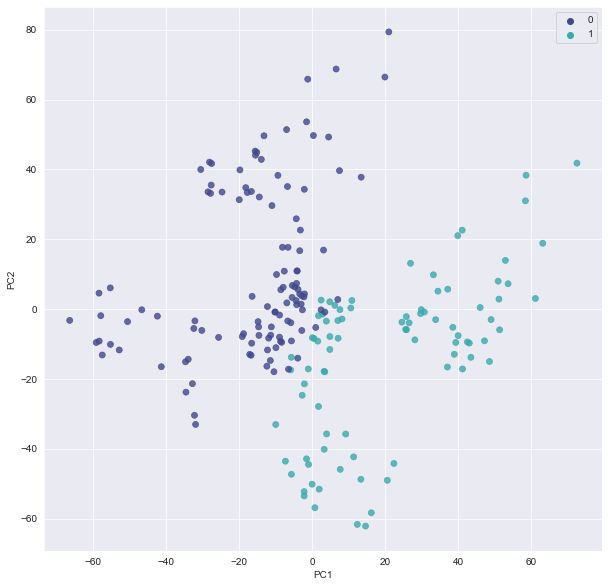

In [1770]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=model6.labels_,
    palette=sns.color_palette('mako', 2), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Birch

In [1771]:
model7 = Birch(branching_factor = 2, n_clusters = 2, threshold = 5)
model7.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

Birch(branching_factor=2, n_clusters=2, threshold=5)

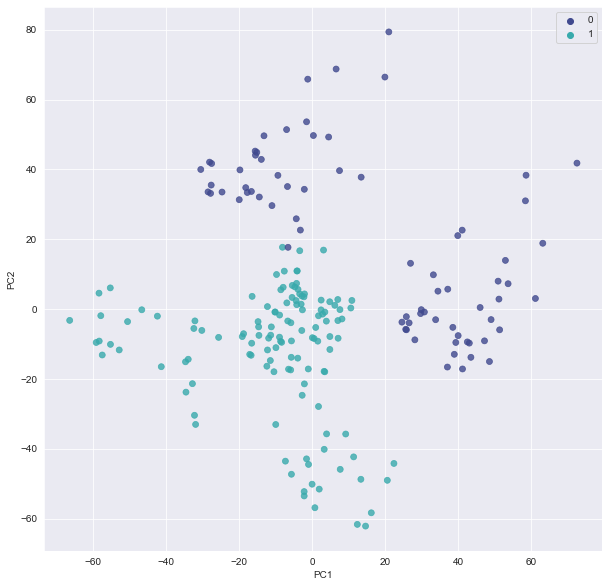

In [1772]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=model7.labels_,
    palette=sns.color_palette('mako', 2), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### DBSCAN

In [1773]:
model8 = DBSCAN(eps = 14, min_samples = 5)
model8.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

DBSCAN(eps=14)

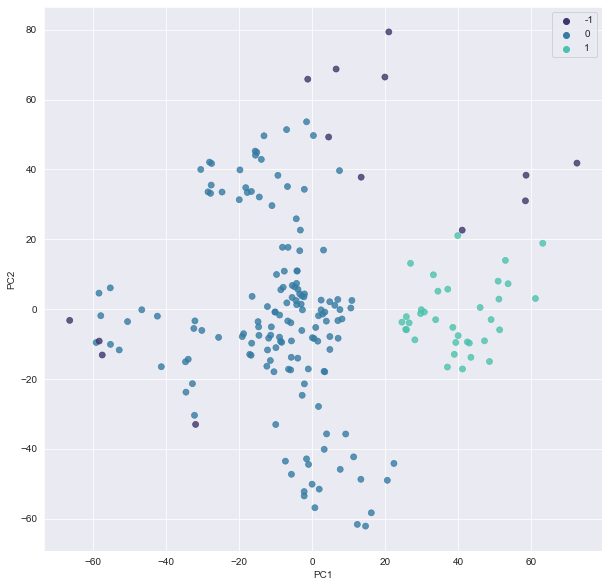

In [1774]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=model8.labels_,
    palette=sns.color_palette('mako', 3), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Gaussian Mixture

In [1775]:
model9 = GaussianMixture(n_components = 2)
model9.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

GaussianMixture(n_components=2)

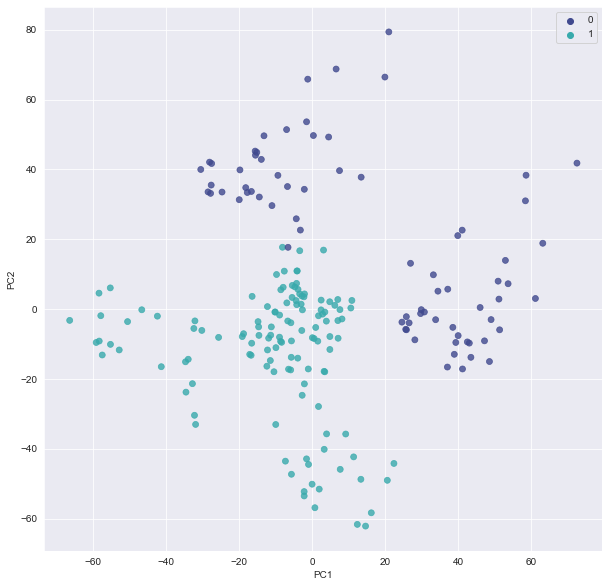

In [1776]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], 
    hue=model9.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)),
    palette=sns.color_palette('mako', 2), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Agglomerative

In [1777]:
model10 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean')
model10.fit(allen.drop(['CustomerID', 'Gender'], axis=1))

AgglomerativeClustering()

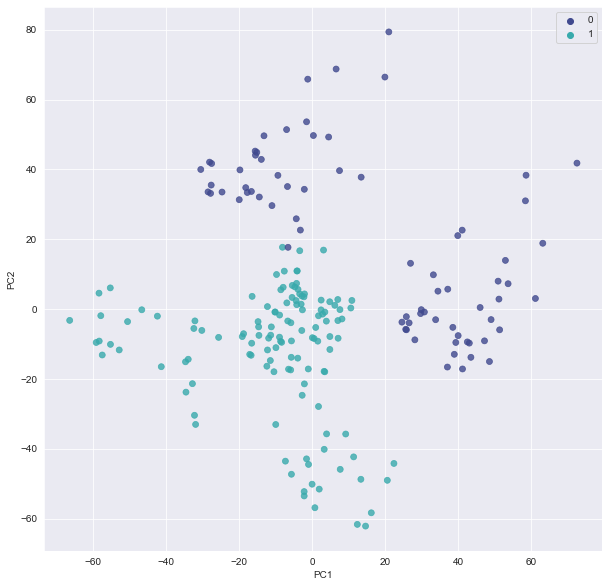

In [1778]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=allen0[:,0], y=allen0[:,1], hue=model10.labels_,
    palette=sns.color_palette('mako', 2), edgecolor=None, alpha=0.8, ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Metrics

### K-Means

In [1779]:
allen6 = allen
allen6['Cluster'] = model6.labels_
allen6.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,1
2,3,0,20,16,6,0
3,4,0,23,16,77,1
4,5,0,31,17,40,0


In [1780]:
c1 = confusion_matrix(allen6['Gender'], allen6['Cluster'])
print(c1)

[[65 47]
 [50 38]]


In [1781]:
print(classification_report(allen6['Gender'], allen6['Cluster']))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57       112
           1       0.45      0.43      0.44        88

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.52      0.51       200



In [1793]:
allen16 = pd.DataFrame({
        'Model':'K-Means',
        'No. of Clusters':["2"],
        'Accuracy':[(c1[0,0]+c1[1,1])/sum(sum(c1))],
        'Specificity':[c1[1,1]/(c1[1,0]+c1[1,1])],
        'Sensitivity':[c1[0,0]/(c1[0,0]+c1[0,1])],
        'Precision':[c1[0,0]/(c1[0,0]+c1[1,1])],
        'F1 Score':[f1_score(allen6['Gender'],allen6['Cluster'],average='weighted')],
        'Silhouette Score':[silhouette_score(allen.drop(['CustomerID', 'Gender'],axis=1), 
         model6.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)))]})
allen16.head()

,Model,No. of Clusters,Accuracy,Specificity,Sensitivity,Precision,F1 Score,Silhouette Score
0,K-Means,2,0.515,0.431818,0.580357,0.631068,0.514,0.293308


### Birch

In [1794]:
allen7 = allen
allen7['Cluster'] = model7.labels_
allen7.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [1795]:
c2 = confusion_matrix(allen7['Gender'], allen7['Cluster'])
print(c2)

[[36 76]
 [38 50]]


In [1796]:
print(classification_report(allen7['Gender'], allen7['Cluster']))

              precision    recall  f1-score   support

           0       0.49      0.32      0.39       112
           1       0.40      0.57      0.47        88

    accuracy                           0.43       200
   macro avg       0.44      0.44      0.43       200
weighted avg       0.45      0.43      0.42       200



In [1797]:
allen17 = pd.DataFrame({
        'Model':'Birch',
        'No. of Clusters':["2"],
        'Accuracy':[(c2[0,0]+c2[1,1])/sum(sum(c2))],
        'Specificity':[c2[1,1]/(c2[1,0]+c2[1,1])],
        'Sensitivity':[c2[0,0]/(c2[0,0]+c2[0,1])],
        'Precision':[c2[0,0]/(c2[0,0]+c2[1,1])],
        'F1 Score':[f1_score(allen7['Gender'],allen7['Cluster'],average='weighted')],
        'Silhouette Score':[silhouette_score(allen.drop(['CustomerID', 'Gender'],axis=1), 
         model7.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)))]})
allen17.head()

,Model,No. of Clusters,Accuracy,Specificity,Sensitivity,Precision,F1 Score,Silhouette Score
0,Birch,2,0.43,0.568182,0.321429,0.418605,0.422382,0.299379


### DBSCAN

In [1798]:
allen8 = allen
allen8['Cluster'] = model8.labels_
allen8.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,-1
1,2,1,21,15,81,0
2,3,0,20,16,6,-1
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [1799]:
c3 = confusion_matrix(allen8['Gender'], allen8['Cluster'])
print(c3)

[[ 0  0  0]
 [ 7 86 19]
 [ 7 65 16]]


In [1800]:
print(classification_report(allen8['Gender'], allen8['Cluster']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.57      0.77      0.65       112
           1       0.46      0.18      0.26        88

    accuracy                           0.51       200
   macro avg       0.34      0.32      0.30       200
weighted avg       0.52      0.51      0.48       200



In [1801]:
allen18 = pd.DataFrame({
        'Model':'DBSCAN',
        'No. of Clusters':["2"],
        'Accuracy':[(c3[1,1]+c3[2,2])/sum(sum(c3))],
        'Specificity':[c3[2,2]/(c3[2,1]+c3[2,2])],
        'Sensitivity':[c3[1,1]/(c3[1,1]+c3[1,2])],
        'Precision':[c3[1,1]/(c3[1,1]+c3[2,2])],
        'F1 Score':[f1_score(allen8['Gender'],allen8['Cluster'],average='weighted')],
        'Silhouette Score':[silhouette_score(allen.drop(['CustomerID', 'Gender'],axis=1), 
         model8.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)))]})
allen18.head()

,Model,No. of Clusters,Accuracy,Specificity,Sensitivity,Precision,F1 Score,Silhouette Score
0,DBSCAN,2,0.51,0.197531,0.819048,0.843137,0.480707,0.26976


### Gaussian Mixture

In [1693]:
allen9 = allen
allen9['Cluster'] = model9.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1))
allen9.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [1694]:
c4 = confusion_matrix(allen9['Gender'], allen9['Cluster'])
print(c4)

[[76 36]
 [50 38]]


In [1695]:
print(classification_report(allen9['Gender'], allen9['Cluster']))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64       112
           1       0.51      0.43      0.47        88

    accuracy                           0.57       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.56      0.57      0.56       200



In [1768]:
allen19 = pd.DataFrame({
        'Model':'Gaussian Mixture',
        'No. of Clusters':["2"],
        'Accuracy':[(c4[0,0]+c4[1,1])/sum(sum(c4))],
        'Specificity':[c4[1,1]/(c4[1,0]+c4[1,1])],
        'Sensitivity':[c4[0,0]/(c4[0,0]+c4[0,1])],
        'Precision':[c4[0,0]/(c4[0,0]+c4[1,1])],
        'F1 Score':[f1_score(allen9['Gender'],allen9['Cluster'],average='weighted')],
        'Silhouette Score':[silhouette_score(allen.drop(['CustomerID', 'Gender'],axis=1), 
         model9.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)))]})
allen19.head()

,Model,No. of Clusters,Accuracy,Specificity,Sensitivity,Precision,F1 Score,Silhouette Score
0,Gaussian Mixture,2,0.57,0.431818,0.678571,0.666667,0.422382,0.320635


### Agglomerative

In [1802]:
allen10 = allen
allen10['Cluster'] = model10.labels_
allen10.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [1803]:
c5 = confusion_matrix(allen10['Gender'], allen10['Cluster'])
print(c5)

[[36 76]
 [38 50]]


In [1804]:
print(classification_report(allen10['Gender'], allen10['Cluster']))

              precision    recall  f1-score   support

           0       0.49      0.32      0.39       112
           1       0.40      0.57      0.47        88

    accuracy                           0.43       200
   macro avg       0.44      0.44      0.43       200
weighted avg       0.45      0.43      0.42       200



In [1807]:
allen110 = pd.DataFrame({
        'Model':'Agglomerative',
        'No. of Clusters':["2"],
        'Accuracy':[(c5[0,0]+c5[1,1])/sum(sum(c5))],
        'Specificity':[c5[1,1]/(c5[1,0]+c5[1,1])],
        'Sensitivity':[c5[0,0]/(c5[0,0]+c5[0,1])],
        'Precision':[c5[0,0]/(c5[0,0]+c5[1,1])],
        'F1 Score':[f1_score(allen10['Gender'],allen10['Cluster'],average='weighted')],
        'Silhouette Score':[silhouette_score(allen.drop(['CustomerID', 'Gender'],axis=1), 
         model10.fit_predict(allen.drop(['CustomerID', 'Gender'], axis=1)))]})
allen110.head()

,Model,No. of Clusters,Accuracy,Specificity,Sensitivity,Precision,F1 Score,Silhouette Score
0,Agglomerative,2,0.43,0.568182,0.321429,0.418605,0.422382,0.299379


# Concat - II

In [1808]:
al2 = pd.concat([allen16,allen17,allen18,allen19,allen110],axis=0).reset_index()
al2 = al2.drop('index',axis=1)
al2

,Model,No. of Clusters,Accuracy,Specificity,Sensitivity,Precision,F1 Score,Silhouette Score
0,K-Means,2,0.515,0.431818,0.580357,0.631068,0.514000,0.293308
1,Birch,2,0.430,0.568182,0.321429,0.418605,0.422382,0.299379
2,DBSCAN,2,0.510,0.197531,0.819048,0.843137,0.480707,0.269760
3,Gaussian Mixture,2,0.570,0.431818,0.678571,0.666667,0.422382,0.320635
4,Agglomerative,2,0.430,0.568182,0.321429,0.418605,0.422382,0.299379
